In [3]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Finite element method (FEM) in 2d

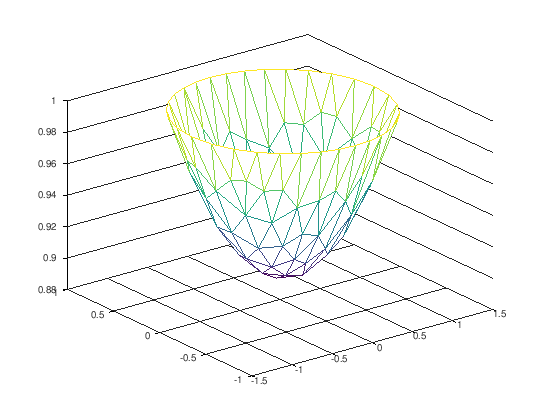

In [20]:
%% 2d boundary value problem:
%   -div(k(x)*grad(u(x)))=f(x) inside of the domain
%   u(x)=U(x) at GammaD
%   k(x)*(du/dn)(x)=g(x) at GammaN

%% example: load triangulation of a circular domain
load('network.mat');
[ POINTS, ELEMENTS, DBOUNDARY, NBOUNDARY ] = format_triangulation( p, e, t );
coords1=POINTS(:,1); coords2=POINTS(:,2);
n_POINTS=size(POINTS,1);
n_ELEMENTS=size(ELEMENTS,1);
DVALUE=ones(length(DBOUNDARY),1);
NVALUE=-0.1*ones(size(NBOUNDARY,1),1);
FREENODE=true(n_POINTS,1); FREENODE(DBOUNDARY)=false;

%% other input data
MATERIALS=ones(n_ELEMENTS,1);
F=-0.5*ones(n_ELEMENTS,1);

%% construction of global "stiffness" matrix and rhs
AREAS=polyarea(coords1(ELEMENTS),coords2(ELEMENTS),2);
A=zeros(n_POINTS);
b=zeros(n_POINTS,1);
for i=1:n_ELEMENTS
    % add local "stiffness" matrix
    x=POINTS(ELEMENTS(i,:),:);
    B_=[x(2,2)-x(3,2) x(3,2)-x(1,2) x(1,2)-x(2,2)
        x(3,1)-x(2,1) x(1,1)-x(3,1) x(2,1)-x(1,1)];
    A_local=MATERIALS(i)*B_'*B_/4/AREAS(i);
    A(ELEMENTS(i,:),ELEMENTS(i,:))=A(ELEMENTS(i,:),ELEMENTS(i,:))+A_local;
    % add local rhs
    b_local=ones(3,1)/3*F(i)*AREAS(i);
    b(ELEMENTS(i,:))=b(ELEMENTS(i,:))+b_local;
end

%% modifications due to boundary conditions
u=zeros(n_POINTS,1);
u(DBOUNDARY)=DVALUE;
b=b-A*u;
for i=1:length(NVALUE)
    x=POINTS(NBOUNDARY(i,:),:);
    b(NBOUNDARY(i,:))=b(NBOUNDARY(i,:))+norm(x(1,:)-x(2,:))*NVALUE(i)/2;
end

%% solution of the resulting linear system and visualization
u(FREENODE)=A(FREENODE,FREENODE)\b(FREENODE);
figure; trimesh(ELEMENTS,coords1,coords2,u);
